# Creating the network

Creating the network .gml file from the column given

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import ast

In [4]:
df_zip = pd.read_csv("zipcode_by_state.csv")
df_zip["Zip Min"].astype(int)
df_zip["Zip Min"].astype(int)
df_zip.head()

,ID,State Name,ST,Zip Min,Zip Max
0,44,Puerto Rico,PR,0,0
1,26,Massachusetts,MA,1001,2791
2,45,Rhode Island,RI,2801,2940
3,34,New Hampshire,NH,3031,3897
4,24,Maine,ME,3901,4992


In [5]:
df_postings = pd.read_csv("../data/postings.csv")

In [ ]:
filtered_columns  = ['job_id', 'company_name', 'description', 'skills_desc', 'zip_code', 'normalized_salary']
df_postings_filtered = df_postings[filtered_columns]
df_postings_filtered

,job_id,company_name,description,skills_desc,zip_code,normalized_salary
0,921716,Corcoran Sawyer Smith,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,8540.0,38480.0
1,1829192,NaN,"At Aspen Therapy and Wellness , we are committ...",NaN,80521.0,83200.0
2,10998357,The National Exemplar,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,45202.0,55000.0
3,23221523,"Abrams Fensterman, LLP",Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,11040.0,157500.0
4,35982263,NaN,Looking for HVAC service tech with experience ...,NaN,52601.0,70000.0
...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Our Walnut Creek office is currently seeking a...,NaN,94595.0,157500.0
123845,3906267126,Pinterest,About Pinterest:\n\nMillions of people across ...,NaN,NaN,NaN
123846,3906267131,EPS Learning,Company Overview\n\nEPS Learning is a leading ...,NaN,99201.0,NaN
123847,3906267195,Trelleborg Applied Technologies,The Business Development Manager is a 'hunter'...,NaN,NaN,NaN


### Adding industries information

In [11]:
# Read the job_industry csv
df_industries_list = pd.read_csv("../data/mappings/industries.csv")
df_industries_list.head()

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"


In [12]:
# Read the industry id file
df_job_industries_match = pd.read_csv("../data/jobs/job_industries.csv")
df_job_industries_match.head()

,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80


In [13]:
df_job_industry_name_match = pd.merge(df_industries_list, df_job_industries_match, on='industry_id', how='inner') 
df_job_industry_name_match.head()

,industry_id,industry_name,job_id
0,1,Defense and Space Manufacturing,3887470617
1,1,Defense and Space Manufacturing,3887475133
2,1,Defense and Space Manufacturing,3884916275
3,1,Defense and Space Manufacturing,3884436032
4,1,Defense and Space Manufacturing,3887489518


In [19]:
df_postings_filtered = pd.merge(df_job_industry_name_match, df_postings_filtered, on='job_id', how='inner') 
df_postings_filtered

,industry_id,industry_name,job_id,company_name,description,skills_desc,zip_code,normalized_salary
0,1,Defense and Space Manufacturing,3887470617,"Softworld, a Kelly Company",Softworld is searching for an experienced Elec...,NaN,48310.0,NaN
1,1,Defense and Space Manufacturing,3887475133,CompTech Computer Technologies,Location: Remote with ability to travel to Bat...,NaN,NaN,68500.0
2,1,Defense and Space Manufacturing,3884916275,Leonardo DRS,Job description:\n\nJob ID: 109384 The Leonar...,NaN,35801.0,NaN
3,1,Defense and Space Manufacturing,3884436032,ITRS Recruiting Services,A global industrial technology Company in the ...,NaN,92019.0,NaN
4,1,Defense and Space Manufacturing,3887489518,Quantum World Technologies Inc.,Title: SAP RTS Functional Consultant Location:...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
158958,3253,Alternative Fuel Vehicle Manufacturing,3903804150,HCLTech,About us : HCLTech is a global technology comp...,NaN,NaN,81120.0
158959,3253,Alternative Fuel Vehicle Manufacturing,3903807073,HCLTech,About us : HCLTech is a global technology comp...,NaN,27330.0,78000.0
158960,3253,Alternative Fuel Vehicle Manufacturing,3903860036,HCLTech,About us : HCLTech is a global technology comp...,NaN,61523.0,111280.0
158961,3253,Alternative Fuel Vehicle Manufacturing,3906093678,Net2Source Inc.,"Hello,\nNet2Source is a Global Workforce Solut...",NaN,61523.0,65520.0


### Adding state information

In [20]:
def assign_state(zipcode):
    # Find the range that the zipcode falls into
    state_row = df_zip[(df_zip['Zip Min'] <= zipcode)]
    
    # Return the state if a match is found, otherwise return None
    if not state_row.empty:
        return state_row['ST'].iloc[-1]
    else:
        return None

In [21]:
assign_state(1500)

'MA'

In [ ]:
df_postings_filtered['state'] = df_postings_filtered['zip_code'].apply(assign_state)
df_postings_filtered.head()


,industry_id,industry_name,job_id,company_name,description,skills_desc,zip_code,normalized_salary,state
0,1,Defense and Space Manufacturing,3887470617,"Softworld, a Kelly Company",Softworld is searching for an experienced Elec...,NaN,48310.0,NaN,MI
1,1,Defense and Space Manufacturing,3887475133,CompTech Computer Technologies,Location: Remote with ability to travel to Bat...,NaN,NaN,68500.0,None
2,1,Defense and Space Manufacturing,3884916275,Leonardo DRS,Job description:\n\nJob ID: 109384 The Leonar...,NaN,35801.0,NaN,AL
3,1,Defense and Space Manufacturing,3884436032,ITRS Recruiting Services,A global industrial technology Company in the ...,NaN,92019.0,NaN,CA
4,1,Defense and Space Manufacturing,3887489518,Quantum World Technologies Inc.,Title: SAP RTS Functional Consultant Location:...,NaN,NaN,NaN,None


In [23]:
all_states = df_postings_filtered["state"].unique()

### Latitude Longitude from Zipcode
To produce a more nuanced analysis of the location, a weighted location-based graph could be created. Using a zip code distance calculation tool [11], job posting nodes can be connected to each other with a weighted edge based on the distance between their respective zip code. A threshold of the maximum distance allowed between two nodes can be set such that any distance between two nodes above this value would not result in an edge connecting them together.
Get lat long from the zipcode
Connect every node to every other node by edge which represents the weight 
Ravasz Clustering with similarity metrics being the distance 
Plot geolocation position on the map


In [42]:
import pgeocode

def get_lat_long(zipcode):
    nomi = pgeocode.Nominatim('us')
    query = nomi.query_postal_code(str(int(zipcode)))
    
    lat = query["latitude"]
    long = query["longitude"]

    return lat, long

In [143]:
# Drop nan in zipcode
df_postings_final = df_postings_filtered.dropna(subset=['zip_code'])
# df_postings_final = df_postings_final.head(100)

In [145]:
df_postings_final

,industry_id,industry_name,job_id,company_name,description,skills_desc,zip_code,normalized_salary,state
0,1,Defense and Space Manufacturing,3887470617,"Softworld, a Kelly Company",Softworld is searching for an experienced Elec...,NaN,48310.0,NaN,MI
2,1,Defense and Space Manufacturing,3884916275,Leonardo DRS,Job description:\n\nJob ID: 109384 The Leonar...,NaN,35801.0,NaN,AL
3,1,Defense and Space Manufacturing,3884436032,ITRS Recruiting Services,A global industrial technology Company in the ...,NaN,92019.0,NaN,CA
6,1,Defense and Space Manufacturing,3887700448,Air National Guard Recruiting,Position Summary There are few things that can...,NaN,31795.0,NaN,GA
7,1,Defense and Space Manufacturing,3884919767,Winchester Interconnect,"At Winchester Interconnect, we dream big, have...",NaN,92840.0,41600.0,CA
...,...,...,...,...,...,...,...,...,...
158956,3253,Alternative Fuel Vehicle Manufacturing,3891021873,Zobility,The Regulations and Government Relations Engin...,NaN,48326.0,NaN,MI
158959,3253,Alternative Fuel Vehicle Manufacturing,3903807073,HCLTech,About us : HCLTech is a global technology comp...,NaN,27330.0,78000.0,NC
158960,3253,Alternative Fuel Vehicle Manufacturing,3903860036,HCLTech,About us : HCLTech is a global technology comp...,NaN,61523.0,111280.0,IL
158961,3253,Alternative Fuel Vehicle Manufacturing,3906093678,Net2Source Inc.,"Hello,\nNet2Source is a Global Workforce Solut...",NaN,61523.0,65520.0,IL


In [148]:
df_postings_final.drop(columns=['description'])

,industry_id,industry_name,job_id,company_name,skills_desc,zip_code,normalized_salary,state
0,1,Defense and Space Manufacturing,3887470617,"Softworld, a Kelly Company",NaN,48310.0,NaN,MI
2,1,Defense and Space Manufacturing,3884916275,Leonardo DRS,NaN,35801.0,NaN,AL
3,1,Defense and Space Manufacturing,3884436032,ITRS Recruiting Services,NaN,92019.0,NaN,CA
6,1,Defense and Space Manufacturing,3887700448,Air National Guard Recruiting,NaN,31795.0,NaN,GA
7,1,Defense and Space Manufacturing,3884919767,Winchester Interconnect,NaN,92840.0,41600.0,CA
...,...,...,...,...,...,...,...,...
158956,3253,Alternative Fuel Vehicle Manufacturing,3891021873,Zobility,NaN,48326.0,NaN,MI
158959,3253,Alternative Fuel Vehicle Manufacturing,3903807073,HCLTech,NaN,27330.0,78000.0,NC
158960,3253,Alternative Fuel Vehicle Manufacturing,3903860036,HCLTech,NaN,61523.0,111280.0,IL
158961,3253,Alternative Fuel Vehicle Manufacturing,3906093678,Net2Source Inc.,NaN,61523.0,65520.0,IL


In [149]:
df_postings_final.to_csv('postings_with_location_possible_nans_no_desc.csv', index=False)

In [ ]:
# Create a shortened list of nodes based on Jessie's code
# Analyze how it relates to diff industries -- Same industry will be one community  

In [ ]:
df_postings_final[['lat', 'long']] = df_postings_final['zip_code'].apply(lambda x: pd.Series(get_lat_long(x)))
df_postings_final = df_postings_final.dropna(subset=['lat'])

df_postings_final

In [94]:
df_postings_final.to_csv('postings_with_location.csv', index=False)

### Clustering

In [95]:
from geopy.distance import great_circle

# Function to calculate distance matrix based on lat/long
def compute_distance_matrix(df):
    coords = df[['lat', 'long']].values
    n = len(coords)
    dist_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            dist = great_circle(coords[i], coords[j]).kilometers
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist  

    return dist_matrix

distance_matrix = compute_distance_matrix(df_postings_final)


### Creating the graph

In [96]:
# Convert DataFrame to dictionary with job_id as key
attrs = {
    row['job_id']: {
        'zipcode': row['zip_code'],
        'lat': row['lat'],
        'long': row['long'],
        'state': row['state'],
        'normalized_salary': row['normalized_salary'],
        'industry_name': row['industry_name'],
    }
    for _, row in df_postings_final.iterrows()
}


In [97]:
import networkx as nx

G = nx.Graph()

# Add nodes to the graph
for idx, row in df_postings_final.iterrows():
    G.add_node(row['job_id'])

jobs = df_postings_final['job_id'].tolist()

nx.set_node_attributes(G, attrs)

n = len(distance_matrix)
for i in range(n):
    for j in range(i + 1, n):
        if distance_matrix[i, j] > 0:  
            node1, node2 = jobs[i], jobs[j]
            G.add_edge(node1, node2, weight=distance_matrix[i, j])

In [98]:
nx.write_gml(G, '../graphs/location_graph_latlong.gml')

================ Community Analysis ================

Community 1: 3 nodes
Cut threshold: 4
Top 10 nodes by degree:
Node: MI, Degree: 92
Node: NY, Degree: 92
Node: NY, Degree: 92

Community 2: 8 nodes
Cut threshold: 4
Top 10 nodes by degree:
Node: GA, Degree: 92
Node: GA, Degree: 92
Node: NC, Degree: 91
Node: NC, Degree: 91
Node: AL, Degree: 89
Node: AL, Degree: 89
Node: AL, Degree: 89
Node: AL, Degree: 89

Community 3: 22 nodes
Cut threshold: 4
Top 10 nodes by degree:
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 92
Node: CA, Degree: 91
Node: CA, Degree: 91

Community 4: 6 nodes
Cut threshold: 4
Top 10 nodes by degree:
Node: GA, Degree: 92
Node: FL, Degree: 92
Node: FL, Degree: 91
Node: FL, Degree: 91
Node: FL, Degree: 91
Node: FL, Degree: 91

Community 5: 28 nodes
Cut threshold: 4
Top 10 nodes by degree:
Node: SC, Degree: 92
Node: VA, Degree: 92
Node: PA, Degree: 92


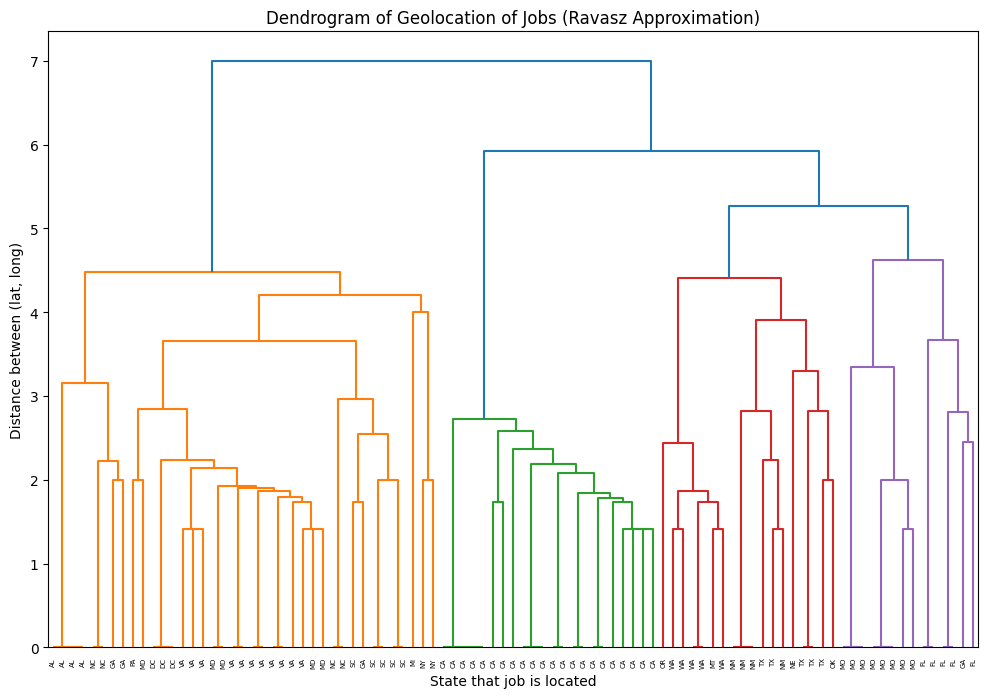

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

dist_threshold = 1000

# Define the similarity metric based on Ravasz's idea:
def calculate_similarity(u, v):
    if G.has_edge(u, v):
        edge_weight = G[u][v]['weight']
        if edge_weight < dist_threshold:
            return 1
        else:
            return 0
    else:
        return 0

# Create a similarity matrix for hierarchical clustering
nodes = list(G.nodes())
similarity_matrix = np.zeros((len(nodes), len(nodes)))

for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        if i < j:  # Avoid redundant calculations
            similarity = calculate_similarity(u, v)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix

# Convert similarity to distance (1 - similarity) for clustering
distance_matrix = 1 - similarity_matrix
distance_array = pdist(distance_matrix)

# Form the dendrogram using hierarchical clustering (average linkage)
Z = linkage(distance_array, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
states = [G.nodes()[node]["state"] for node in G.nodes()]
dendrogram(Z, labels=states, leaf_rotation=90)
plt.title("Dendrogram of Geolocation of Jobs (Ravasz Approximation)")
plt.xlabel("State that job is located")
plt.ylabel("Distance between (lat, long)")
plt.savefig("figures/ravasz_dendrogram.jpg")

# Define a parameter to "cut" the dendrogram and form communities
cut_threshold = 4  # Adjust this to control the community granularity
clusters = fcluster(Z, cut_threshold, criterion='distance')

# Print out the communities in the same format
community_dict = {}
for node, cluster_id in zip(nodes, clusters):
    if cluster_id not in community_dict:
        community_dict[cluster_id] = []
    community_dict[cluster_id].append(node)

print("================ Community Analysis ================\n")
for i, (cluster_id, community_nodes) in enumerate(community_dict.items(), 1):
    community_subgraph = G.subgraph(community_nodes)
    print(f"Community {i}: {len(community_nodes)} nodes")
    print(f"Cut threshold: {cut_threshold}")
    
    # Sort nodes by degree and select top 10 by degree within the community
    top_10_nodes = sorted(
        [(node, G.degree[node]) for node in community_nodes],
        key=lambda x: x[1],
        reverse=True
    )[:10]

    print("Top 10 nodes by degree:")
    for node, degree in top_10_nodes:
        state = G.nodes()[node]["state"]
        print(f"Node: {state}, Degree: {degree}")
    print("=========================================\n")

In [141]:
# Number of communities
print(f"Number of communities: {len(community_dict.keys())}")


Number of communities: 8


In [123]:
# Assign the cluster name to a new column in the df
node_to_cluster = {}
for cluster_id, community_nodes in community_dict.items():
    for node in community_nodes:
        node_to_cluster[node] = cluster_id
df_postings_final['cluster_id'] = df_postings_final['job_id'].map(node_to_cluster)

df_postings_final

/tmp/ipykernel_5265/3291783081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_postings_final['cluster_id'] = df_postings_final['job_id'].map(node_to_cluster)


,industry_id,industry_name,job_id,company_name,description,skills_desc,zip_code,normalized_salary,state,lat,long,cluster_id
0,1,Defense and Space Manufacturing,3887470617,"Softworld, a Kelly Company",Softworld is searching for an experienced Elec...,NaN,48310.0,NaN,MI,42.5648,-83.0701,3
2,1,Defense and Space Manufacturing,3884916275,Leonardo DRS,Job description:\n\nJob ID: 109384 The Leonar...,NaN,35801.0,NaN,AL,34.7269,-86.5673,1
3,1,Defense and Space Manufacturing,3884436032,ITRS Recruiting Services,A global industrial technology Company in the ...,NaN,92019.0,NaN,CA,32.7777,-116.9191,4
6,1,Defense and Space Manufacturing,3887700448,Air National Guard Recruiting,Position Summary There are few things that can...,NaN,31795.0,NaN,GA,31.4718,-83.6468,8
7,1,Defense and Space Manufacturing,3884919767,Winchester Interconnect,"At Winchester Interconnect, we dream big, have...",NaN,92840.0,41600.0,CA,33.7869,-117.9273,4
...,...,...,...,...,...,...,...,...,...,...,...,...
112,1,Defense and Space Manufacturing,3888034251,ClearanceJobs,Job Number 664215BR Description:WHO WE ARE\n\n...,NaN,76102.0,NaN,TX,32.7589,-97.3280,6
114,1,Defense and Space Manufacturing,3888033428,Engineered Staffing Solutions,"Manufacturing Engineer (Automation) Dublin, GA...",NaN,31021.0,NaN,GA,32.4593,-82.9381,1
115,1,Defense and Space Manufacturing,3888038058,ClearanceJobs,Duties * Develop the Architect-Engineer scope ...,NaN,31401.0,NaN,GA,32.0749,-81.0883,2
116,1,Defense and Space Manufacturing,3888034548,ClearanceJobs,Position Summary\n\nOur client is looking for ...,NaN,20755.0,NaN,MD,39.1059,-76.7467,2


### Plot points on North America map

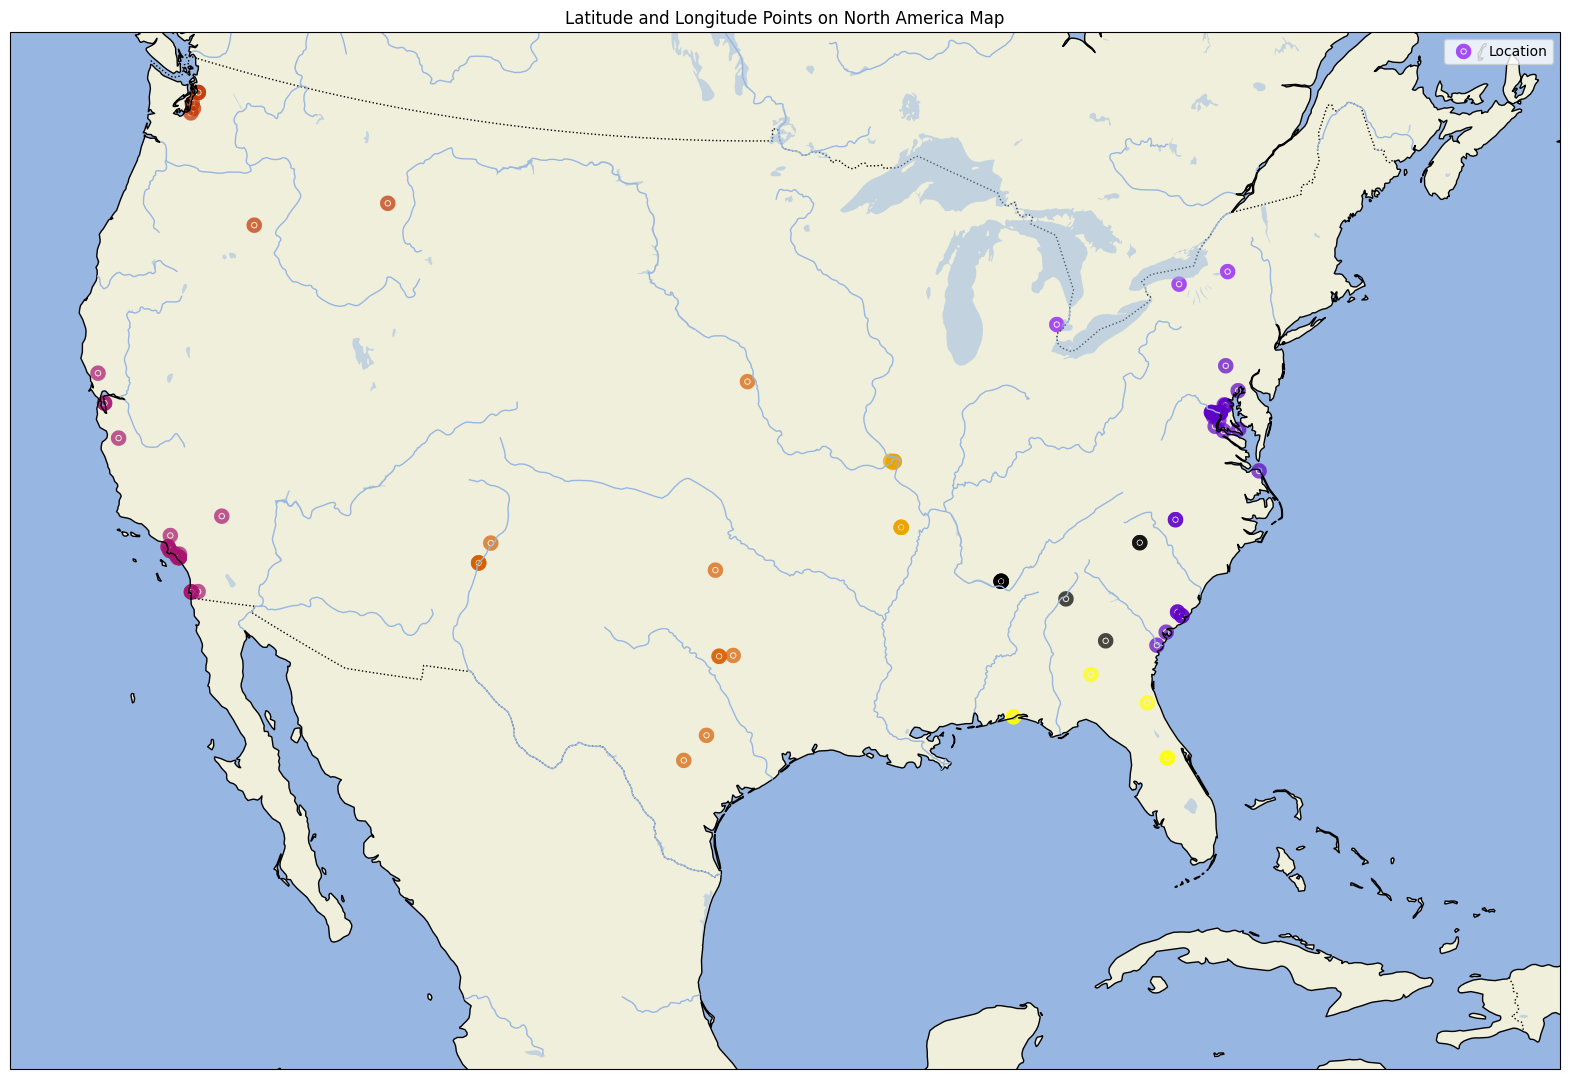

In [138]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm

# Referenced from https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
def plot_north_america(df):
    # Set up North America map using Cartopy
    fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.LambertConformal()})
    ax.set_extent([-120, -70, 20, 50], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    cmap = cm.gnuplot  
    # Plot latitude and longitude points
    ax.scatter(
        df['long'], df['lat'],
        c=df_postings_final['cluster_id'], 
        cmap=cmap, s=10, alpha=0.7,
        linewidths=8,
        transform=ccrs.PlateCarree(),
        label='Location'
    )

    # Add labels and title
    plt.title('Latitude and Longitude Points on North America Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    # Show the plot
    plt.show()

plot_north_america(df_postings_final)


## Skill analysis
identify each job id to be a certain cluster based on the number of skills and which cluster most of the skill belongs to 
Assign that job id to be in that cluster

In [ ]:
postings_parsed = pd.read_csv("../data/postings_parsed.csv")


In [ ]:
df_postings_final_with_skills = pd.merge(df_postings_final, 
                                postings_parsed[['job_id', 'skills']], 
                                on='job_id', 
                                how='left')